![Random image](./Screenshot.png)

In [1]:
from typing import Callable
import numpy as np
import math
import scipy.integrate as integrate
import scipy.special as special
import random

# I think vol should be a dictionary, strike price to vol, or two lists, or nx2 numpy array?

def I1(x, vol: dict, K_i, K_j, R, D, time_till_expiry):
    const = K_i / (4*math.pi*K_j*vol[K_i]*vol[K_j])
    outer_integral_range = [0, time_till_expiry]
    return None

'''
  - R: interest rate
  - D: Didividend yield
'''
def I2(x, vol: dict, K_i, K_j, R, D, time_till_expiry):
    const = (2 / ( math.sqrt(2*math.pi)*(vol[K_j]**2) )) * ((R*K_i/K_j)-D)
    integral_range = [0, vol[K_j]* math.sqrt(time_till_expiry)]
    integrand = lambda s: math.exp(-((math.log(x)/K_j)**2)/(2*(s[0]**2)))
    integral_value, _ = integrate.fixed_quad(integrand, integral_range[0], integral_range[1], n=5)
    return const * integral_value



# def iter_vol(vol: Callable, ):


# Test I1
Ks = [5*x + 50 for x in range(100)]
vol = {}
for K in Ks:
    vol[K] = (random.random() * 25)

I2(100, vol, Ks[2], Ks[30], R=0.01, D=0, time_till_expiry=43/252)


7.552869851339665e-05

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('ggplot')


aapl = yf.Ticker("aapl")

expiry_dates = aapl.options
print(expiry_dates)
date = expiry_dates[4]
print(date)
aapl_options = aapl.option_chain(date)
aapl_calls = aapl_options.calls
aapl_calls.head()

/Users/rahulgupta/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

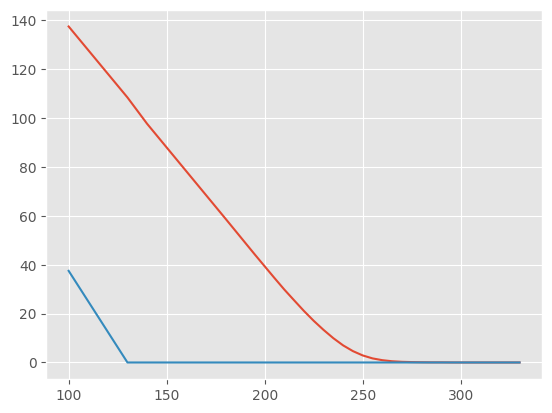

In [15]:
aapl_calls['expiry_value'] = aapl_calls.apply(lambda row: max(row['bid'] - row['strike'], 0), axis=1)
plt.plot(aapl_calls['strike'], aapl_calls['bid'], label='bids')
plt.plot(aapl_calls['strike'], aapl_calls['expiry_value'], label='Value at expiry')
